# Library

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opendatasets

     ---------------------------------------- 63.3/63.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77731 sha256=490226042047c2bf04231f4166f3ab509d1ad6e3c4739a806bb32237a6b64f67
  Stored in directory: c:\users\hasan\appdata\local\pip\cache\wheels\f3\16\ff\34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Library to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

# Library tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Surpress warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Read dataset
data = pd.read_csv('clean_text.csv')
data.head()

,text,class,clean_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...
3,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggling years afraid pa...


In [8]:
X = data['clean_text'].astype(str)
y = data['class']

# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [9]:
# Test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,encoded_y, test_size=.2, random_state=42)

# Data Preprocessing

In [10]:
vocab_size = 10_000
max_length = 10_000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(y_train)
testing_labels = np.array(y_test)

# Basic Model Embeding Layers

In [11]:
embedding_dim = 16

# Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10000, 16)         160000    
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense (Dense)               (None, 128)               20480128  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20,673,281
Trainable params: 20,673,281
No

In [12]:
num_epochs = 50

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
5802/5802 [==============================] - 50s 8ms/step - loss: 0.1956 - accuracy: 0.9245 - val_loss: 0.1680 - val_accuracy: 0.9371
Epoch 2/50
5802/5802 [==============================] - 54s 9ms/step - loss: 0.1505 - accuracy: 0.9444 - val_loss: 0.1607 - val_accuracy: 0.9383
Epoch 3/50
5802/5802 [==============================] - 52s 9ms/step - loss: 0.1297 - accuracy: 0.9523 - val_loss: 0.1637 - val_accuracy: 0.9379
Epoch 4/50
5802/5802 [==============================] - 52s 9ms/step - loss: 0.1044 - accuracy: 0.9622 - val_loss: 0.1770 - val_accuracy: 0.9327
Epoch 5/50
5802/5802 [==============================] - 52s 9ms/step - loss: 0.0789 - accuracy: 0.9718 - val_loss: 0.1877 - val_accuracy: 0.9371
Epoch 6/50
5802/5802 [==============================] - 52s 9ms/step - loss: 0.0602 - accuracy: 0.9789 - val_loss: 0.2414 - val_accuracy: 0.9321
Epoch 7/50
5802/5802 [==============================] - 52s 9ms/step - loss: 0.0487 - accuracy: 0.9829 - val_loss: 0.2678 - val_ac

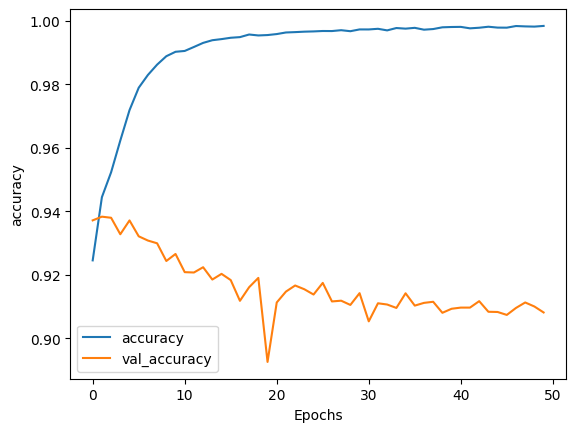

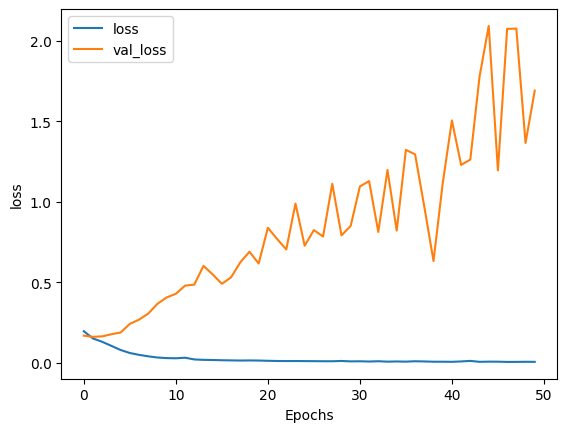

In [13]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Model Basic + Global Average Pooling

In [14]:
embedding_dim = 16

# Initialize the model
model_GlobalAveragePooling1D = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_GlobalAveragePooling1D.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_GlobalAveragePooling1D.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 16)         160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 128)               2176      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                      

In [15]:
num_epochs = 50

# Train the model
history_GlobalAveragePooling1D = model_GlobalAveragePooling1D.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
5802/5802 [==============================] - 38s 6ms/step - loss: 0.4901 - accuracy: 0.7128 - val_loss: 0.2370 - val_accuracy: 0.9124
Epoch 2/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.2369 - accuracy: 0.9090 - val_loss: 0.2154 - val_accuracy: 0.9175
Epoch 3/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.2175 - accuracy: 0.9168 - val_loss: 0.1955 - val_accuracy: 0.9282
Epoch 4/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.2072 - accuracy: 0.9215 - val_loss: 0.2508 - val_accuracy: 0.8995
Epoch 5/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.2005 - accuracy: 0.9236 - val_loss: 0.2344 - val_accuracy: 0.9281
Epoch 6/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.1959 - accuracy: 0.9259 - val_loss: 0.1921 - val_accuracy: 0.9319
Epoch 7/50
5802/5802 [==============================] - 37s 6ms/step - loss: 0.1897 - accuracy: 0.9282 - val_loss: 0.1891 - val_ac

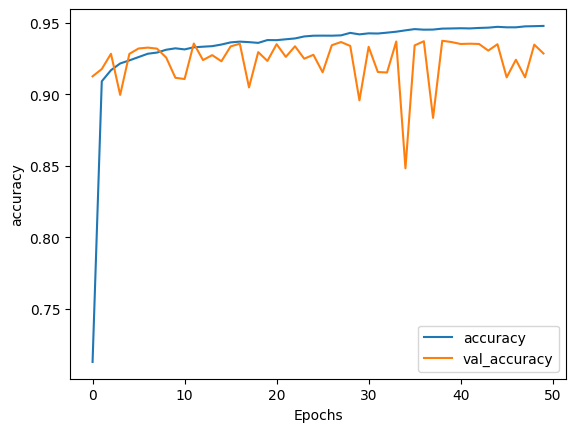

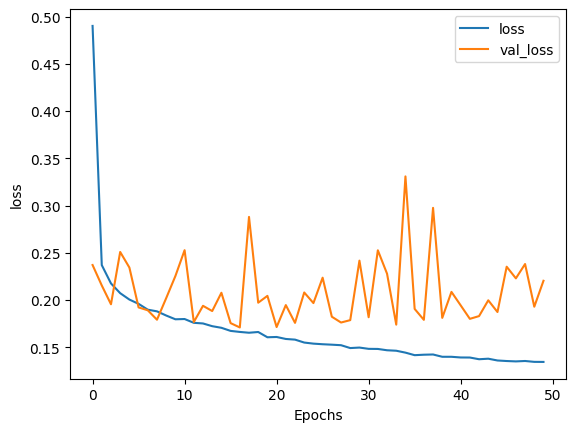

In [16]:
# Plot the accuracy and loss
plot_graphs(history_GlobalAveragePooling1D, "accuracy")
plot_graphs(history_GlobalAveragePooling1D, "loss")

# Model Embedding + Conv1D

In [17]:
kernel_size = 5
filters = 128

# Initialize the model
model_Conv1D = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_Conv1D.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_Conv1D.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10000, 16)         160000    
                                                                 
 conv1d (Conv1D)             (None, 9996, 128)         10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                      

In [18]:
num_epochs = 50

# Train the model
history_Conv1D = model_Conv1D.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
5802/5802 [==============================] - 203s 34ms/step - loss: 0.1868 - accuracy: 0.9292 - val_loss: 0.1790 - val_accuracy: 0.9277
Epoch 2/50
5802/5802 [==============================] - 200s 34ms/step - loss: 0.1379 - accuracy: 0.9488 - val_loss: 0.1596 - val_accuracy: 0.9392
Epoch 3/50
5802/5802 [==============================] - 200s 34ms/step - loss: 0.1104 - accuracy: 0.9595 - val_loss: 0.1582 - val_accuracy: 0.9412
Epoch 4/50
5802/5802 [==============================] - 200s 34ms/step - loss: 0.0847 - accuracy: 0.9694 - val_loss: 0.1815 - val_accuracy: 0.9350
Epoch 5/50
5802/5802 [==============================] - 200s 34ms/step - loss: 0.0655 - accuracy: 0.9764 - val_loss: 0.1981 - val_accuracy: 0.9327
Epoch 6/50
5802/5802 [==============================] - 200s 34ms/step - loss: 0.0518 - accuracy: 0.9808 - val_loss: 0.2273 - val_accuracy: 0.9319
Epoch 7/50
5802/5802 [==============================] - 202s 35ms/step - loss: 0.0423 - accuracy: 0.9845 - val_loss: 0

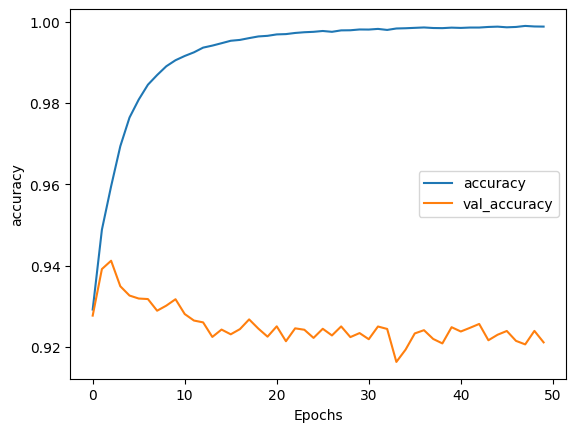

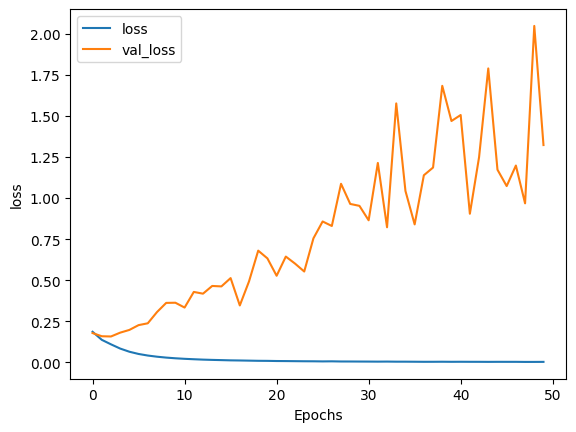

In [19]:
# Plot the accuracy and loss
plot_graphs(history_Conv1D, "accuracy")
plot_graphs(history_Conv1D, "loss")

# Save Model

In [20]:
# save the model
# Basic Model Embbeding
model.save("Model_Basic_Embedding.h5")

# Embedding Global Average
model_GlobalAveragePooling1D.save("Model_Embedding_GlobalAveragePooling1D.h5")

# Embedding + Conv1D
model_Conv1D.save("Model_Embedding_Conv1D.h5")